<strong/><font size=4>DATA 601 Final Project<br></strong>

Group members: Tiru Wube, Siyu Ma<br> 

<strong/><font size=4>EDA and Hypothesis Testing — Combined Two Datasets</strong>

<strong/><font size=3>Description<br></strong>
This group project explored different health factor variables and their relationships using two datasets. One dataset is from NHIS for the U.S., and the other one is from the UC Irvine Machine Learning Repository for Latin American countries( Peru, Colombia, and Mexico). <br>

The analysis  focused on statistical data analysis and answered specific questions for 18 and older adults. We explored the datasets using exploratory data analysis. Based on specific objectives and questions, the project will focus on hypothesis analysis, the relationship between variables, and if a specific outcome significantly differs from group to group. <br>

<strong/><font size=3>Exploratory data analysis and hypothesis testing:<br></strong>
1. Analysis of dataset

2. Visualization 

3. Hypothesis/assumptions for specific questions related to both datasets 

4. Test the hypothesis and give a conclusion<br>


<strong/><font size=3>Key questions:</strong><br>
1. Does the percentage of cigarette smoking vary by country? <br>

2. Does body mass index differ by gender in different countries? <br>

3. Does the body mass index distribution differ by Age in different countries? <br>

4. Does the smoking age vary by country? <br>



<strong/><font size=3>Hypothesis Testing Method:<br></strong>
Based on the type of question, both members used the following methods: Python - Jupyter notebook, use visualization, percentage computing, statistical summary, and statistical tests (Z-test, T-Test, chi-square, etc.)


<strong/><font size=3>Data sources:<br></strong>
1. The first dataset sources and location: the 2019 NHIS data, named Sample Adult file, will be used. The 2019 data is free and available in CSV and ASCII format, the latest CDC website’s latest data. Both the CSV and ASCII formats can be download from this website: https://www.cdc.gov/nchs/nhis/2019nhis.html 
   Data size: CSV data size= 25.5 MB and rows= 31997, columns= 534 as it was read using pandas

2. The second dataset source and location: The dataset is from the UC Irvine Machine Learning Repository website.
  Data download link:
  https://archive.ics.uci.edu/ml/machine-learning-databases/00544/
  From:
  https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#
  Country: Mexico, Peru, and Colombia Population: People from Mexico, Peru, and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition
  Data size: CSV size 328 KB, 2111 rows, 17 columns.
  
Data are legal to access. Although the websites have information about the survey questions and others, there is no documented EDA for these Data and no other statistical analysis.
Data are free to download at no cost.

<strong/><font size=3>Install researchpy module

In [1]:
!pip install researchpy

In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import researchpy
import scipy.stats as stats
from statsmodels.formula.api import ols
import seaborn as sns

<strong/><font size=3>Import the first dataset of Latin countires adults

In [3]:
# read the data from URL
url = "https://drive.google.com/file/d/1NTbBkvUtYM7vJSkNEvG3ONDpDJphMc2R/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_Latin=pd.read_csv(path)

# change the column names
df_Latin.columns =['Gender_Latin', 'Age_Latin','Height_Latin','Weight_Latin','FamHist_overweight_Latin',
             'Freq_HighCalFood_Latin','Freq_Veggie_Latin','Num_MainMeals_Latin',
             'FoodBetweenMeals_Latin','Smoke_Latin','WaterIntake_Latin','MonitoringCal_Latin',
             'Physical_Activity_Latin','Time_TechDeivce_Latin','Alcohol_Latin','Transportation_Latin',
             'OverWeight/Obesity_Type_Latin']
# display the top five rows of dataset
df_Latin.head()


,Gender_Latin,Age_Latin,Height_Latin,Weight_Latin,FamHist_overweight_Latin,Freq_HighCalFood_Latin,Freq_Veggie_Latin,Num_MainMeals_Latin,FoodBetweenMeals_Latin,Smoke_Latin,WaterIntake_Latin,MonitoringCal_Latin,Physical_Activity_Latin,Time_TechDeivce_Latin,Alcohol_Latin,Transportation_Latin,OverWeight/Obesity_Type_Latin
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# dataframe size
df_Latin.shape

(2111, 17)

In [5]:
# Data cleaning: The other dataset's age is 18 and above
df_Latin = df_Latin[df_Latin.Age_Latin >=18]

In [6]:
df_Latin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender_Latin                   1998 non-null   object 
 1   Age_Latin                      1998 non-null   float64
 2   Height_Latin                   1998 non-null   float64
 3   Weight_Latin                   1998 non-null   float64
 4   FamHist_overweight_Latin       1998 non-null   object 
 5   Freq_HighCalFood_Latin         1998 non-null   object 
 6   Freq_Veggie_Latin              1998 non-null   float64
 7   Num_MainMeals_Latin            1998 non-null   float64
 8   FoodBetweenMeals_Latin         1998 non-null   object 
 9   Smoke_Latin                    1998 non-null   object 
 10  WaterIntake_Latin              1998 non-null   float64
 11  MonitoringCal_Latin            1998 non-null   object 
 12  Physical_Activity_Latin        1998 non-null   f

In [7]:
df_Latin.describe()

,Age_Latin,Height_Latin,Weight_Latin,Freq_Veggie_Latin,Num_MainMeals_Latin,WaterIntake_Latin,Physical_Activity_Latin,Time_TechDeivce_Latin
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,24.725786,1.701044,87.915399,2.424968,2.676815,2.010469,0.990090,0.638292
std,6.271890,0.093134,26.091561,0.533031,0.766883,0.615969,0.841901,0.605196
min,18.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.393019,1.630000,68.457437,2.000000,2.668225,1.569358,0.112436,0.000000
50%,23.000000,1.700029,84.378461,2.393251,3.000000,2.000000,1.000000,0.585974
75%,26.000000,1.767135,108.990150,3.000000,3.000000,2.496789,1.609904,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<strong/><font size=3>Adding BMI column to the first dataset by applying mathematical formula of BMI

In [8]:
# calculating the BMI for Latin countries dataset and add a new column for BMI values
df_Latin['BMIcont_Latin'] = df_Latin['Weight_Latin']/(df_Latin['Height_Latin']**2)
df_Latin.head()

,Gender_Latin,Age_Latin,Height_Latin,Weight_Latin,FamHist_overweight_Latin,Freq_HighCalFood_Latin,Freq_Veggie_Latin,Num_MainMeals_Latin,FoodBetweenMeals_Latin,Smoke_Latin,WaterIntake_Latin,MonitoringCal_Latin,Physical_Activity_Latin,Time_TechDeivce_Latin,Alcohol_Latin,Transportation_Latin,OverWeight/Obesity_Type_Latin,BMIcont_Latin
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


<strong/><font size=3>Import the second dataset of U.S. adults

In [9]:
# read the csv dataset from URL
df = pd.read_csv('ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NHIS/2019/adult19csv.zip', engine ='python')
df.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13


In [10]:
# change columns names
df_USA= df[['AGEP_A','SEX_A','HYPEV_A','HEIGHTTC_A','WEIGHTLBTC_A', 'SMKCIGST_A','BMICAT_A' ,'HISPALLP_A']].copy()
df_USA.columns = ['Age_USA','Gender_USA','Hypertension_USA','Height_USA','Weight_USA','Smoke_USA','BMICAT_USA','Race_USA']

<strong/><font size=3>Add another smoking satus column with values similar structure with the other dataset

In [11]:
# change smoke status values from number to yes or no to have similar values with the other dataset
df_USA['SmokeUSAyesNo']=df_USA['Smoke_USA']
df_USA['SmokeUSAyesNo']
df_USA.loc[(df_USA['Smoke_USA'] == 1) | (df_USA['Smoke_USA']== 2)|(df_USA['Smoke_USA']== 5), 'SmokeUSAyesNo'] = 'yes'
df_USA.loc[(df_USA['Smoke_USA'] == 3) | (df_USA['Smoke_USA']==4), 'SmokeUSAyesNo'] = 'no'

In [12]:
# display the top five rows of the dataset
df_USA.head()

,Age_USA,Gender_USA,Hypertension_USA,Height_USA,Weight_USA,Smoke_USA,BMICAT_USA,Race_USA,SmokeUSAyesNo
0,97,1,2,71,201,4,3,3,no
1,28,2,2,62,130,2,2,2,yes
2,72,1,1,74,215,4,3,2,no
3,60,1,1,72,290,4,4,1,no
4,60,1,1,72,290,1,4,2,yes


In [13]:
# dataframe size
df_USA.shape

(31997, 9)

In [14]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31997 entries, 0 to 31996
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age_USA           31997 non-null  int64 
 1   Gender_USA        31997 non-null  int64 
 2   Hypertension_USA  31997 non-null  int64 
 3   Height_USA        31997 non-null  int64 
 4   Weight_USA        31997 non-null  int64 
 5   Smoke_USA         31997 non-null  int64 
 6   BMICAT_USA        31997 non-null  int64 
 7   Race_USA          31997 non-null  int64 
 8   SmokeUSAyesNo     31997 non-null  object
dtypes: int64(8), object(1)
memory usage: 2.2+ MB


In [15]:
df_USA.describe()

,Age_USA,Gender_USA,Hypertension_USA,Height_USA,Weight_USA,Smoke_USA,BMICAT_USA,Race_USA
count,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000
mean,52.120136,1.540019,1.651874,68.717223,247.636622,3.500703,3.131231,2.185955
std,18.465314,0.501218,0.548590,8.276404,233.137001,1.296437,1.283264,0.926603
min,18.000000,1.000000,1.000000,59.000000,100.000000,1.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000,64.000000,150.000000,3.000000,2.000000,2.000000
50%,53.000000,2.000000,2.000000,67.000000,179.000000,4.000000,3.000000,2.000000
75%,67.000000,2.000000,2.000000,70.000000,215.000000,4.000000,4.000000,2.000000
max,99.000000,7.000000,9.000000,99.000000,999.000000,9.000000,9.000000,7.000000


<strong/><font size=3>Data Cleaning and Adding BMI continuous data column to the second dataset

In [16]:
#Data cleaning based on the above describe() table; max() values: there are some unprovided values for Height and weight columns
df_USA = df_USA[df_USA.Height_USA<96]
df_USA = df_USA[df_USA.Weight_USA <996]
df_USA['BMIcont_USA'] =(df_USA['Weight_USA']/(df_USA['Height_USA'])**2)*703  # get the BMI continous values for USA dataframe

In [17]:
df_USA.describe()

,Age_USA,Gender_USA,Hypertension_USA,Height_USA,Weight_USA,Smoke_USA,BMICAT_USA,Race_USA,BMIcont_USA
count,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000,29170.00000,29170.000000,29170.000000,29170.000000
mean,52.168769,1.532259,1.651834,66.774597,176.980836,3.48687,2.958862,2.185327,27.831583
std,18.373146,0.498967,0.522326,3.887764,39.322329,1.27082,0.819276,0.923264,5.466311
min,18.000000,1.000000,1.000000,59.000000,100.000000,1.00000,1.000000,1.000000,14.765806
25%,36.000000,1.000000,1.000000,64.000000,148.000000,3.00000,2.000000,2.000000,23.774714
50%,53.000000,2.000000,2.000000,67.000000,174.000000,4.00000,3.000000,2.000000,27.112948
75%,67.000000,2.000000,2.000000,70.000000,200.000000,4.00000,4.000000,2.000000,31.090010
max,99.000000,2.000000,9.000000,76.000000,299.000000,9.00000,4.000000,7.000000,52.725000


In [18]:
# display the top five rows after cleaning data
df_USA.head()

,Age_USA,Gender_USA,Hypertension_USA,Height_USA,Weight_USA,Smoke_USA,BMICAT_USA,Race_USA,SmokeUSAyesNo,BMIcont_USA
0,97,1,2,71,201,4,3,3,no,28.030748
1,28,2,2,62,130,2,2,2,yes,23.774714
2,72,1,1,74,215,4,3,2,no,27.601351
3,60,1,1,72,290,4,4,1,no,39.326775
4,60,1,1,72,290,1,4,2,yes,39.326775



<strong/><font size=5> Part I: Exploratory Data Analysis (EDA)




<strong/><font size=3>EDA - Smoking behavior by country

In [19]:
# extract the smoking behavior from Latin contries dataset
df_Latin_smoke= df_Latin['Smoke_Latin']

In [20]:
df_Latin_smoke.head()

0     no
1    yes
2     no
3     no
4     no
Name: Smoke_Latin, dtype: object

In [21]:
# get the percentage of smoking behavior
df_Latin_smokePercent=df_Latin_smoke.value_counts(normalize=True, sort=True).mul(100).round(1)

In [22]:
# percentage of smoke consumption for adluts in Latin counties
y_Latin=df_Latin_smokePercent.values[0:]
y_Latin

array([97.8,  2.2])

Note: In Latin countries, 97.8% adults do not consume cigarettes, 2.2% of them do consume cigarettes.

In [23]:
LatinMale_group=  df_Latin['Smoke_Latin'][df_Latin['Gender_Latin'] == 'Male']
LatinFemale_group=  df_Latin['Smoke_Latin'][df_Latin['Gender_Latin'] == 'Female']

LatinMale_groupPercnt=LatinMale_group.value_counts(normalize=True, sort=True).mul(100).round(1)
LatinFemale_groupPercnt=LatinFemale_group.value_counts(normalize=True, sort=True).mul(100).round(1)

y_LatinMale=LatinMale_groupPercnt.values[0:]
y_LatinFemale=LatinFemale_groupPercnt.values[0:]
# Female percentage of smoking behavior in Latin countries
y_LatinFemale

array([98.5,  1.5])

Note: For Latin females, 98.5% of them do not consume cigarettes, 1.5% of them do consume cigarettes.

In [24]:
# male percentage of smoking behavior in Latin coyntries
y_LatinMale

array([97.1,  2.9])

Note: For Latin males, 97.1% of them do not consume cigarettes, 2.9% of them consume cigarettes.

In [25]:
# smoking status for the adults in the U.S.
df_USA = df_USA[df_USA.SmokeUSAyesNo!=9]   # cleaing unavailable value
df_USA_smoke= df_USA['SmokeUSAyesNo']
df_USA.head()

,Age_USA,Gender_USA,Hypertension_USA,Height_USA,Weight_USA,Smoke_USA,BMICAT_USA,Race_USA,SmokeUSAyesNo,BMIcont_USA
0,97,1,2,71,201,4,3,3,no,28.030748
1,28,2,2,62,130,2,2,2,yes,23.774714
2,72,1,1,74,215,4,3,2,no,27.601351
3,60,1,1,72,290,4,4,1,no,39.326775
4,60,1,1,72,290,1,4,2,yes,39.326775


In [26]:
df_USA_smoke.head()

0     no
1    yes
2     no
3     no
4    yes
Name: SmokeUSAyesNo, dtype: object

In [27]:
# calculate percentage
df_USA_smokepercent=df_USA_smoke.value_counts(normalize=True, sort=True).mul(100).round(1)

In [28]:
y_USA=df_USA_smokepercent.values[0:]
y_USA

array([86.2, 13.8])

Note: For adults in the U.S., 86.2% of them do not consume cigarettes, 13.8% of them do consume cigarettes.

In [29]:
USAMale_group= df_USA['SmokeUSAyesNo'][df_USA['Gender_USA'] == 1]
USAFemale_group= df_USA['SmokeUSAyesNo'][df_USA['Gender_USA'] == 2]

USAMale_groupPercnt=USAMale_group.value_counts(normalize=True, sort=True).mul(100).round(1)
USAFemale_groupPercnt=USAFemale_group.value_counts(normalize=True, sort=True).mul(100).round(1)

y_USAMale=USAMale_groupPercnt.values[0:]
y_USAFemale=USAFemale_groupPercnt.values[0:]

In [30]:
# percentage of U.S. male smoking consumption
y_USAMale

array([84.8, 15.2])

Note: For USA males, 84.8% of them do not consume cigarettes, 15.2% of them do consume cigarettes.

In [31]:
# percentage of U.S. female smoking consumption
y_USAFemale

array([87.5, 12.5])

Note: For USA females, 87.5% of them do not consume cigarettes, 12.5% of them consume cigarettes.

<strong/><font size=3> Graphical Analysis

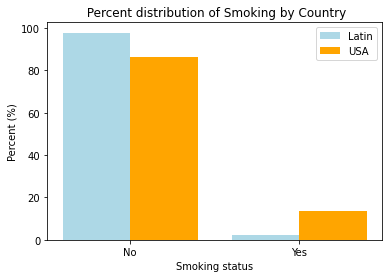

In [32]:
# plot of percentage of smoking behavior in both Latin counties and the U.S.
X2= np.arange(2)
x_ticks = ['No','Yes']
#fig, ax = plt.subplots()
bar_width = 0.4
plt.bar(X2-1*bar_width,y_Latin,label='Latin',width = bar_width,color='lightblue')
plt.bar(X2,y_USA,label='USA',width = bar_width,color='orange')
plt.xlabel('Smoking status')
plt.ylabel('Percent (%)')
plt.title(' Percent distribution of Smoking by Country')
plt.xticks(X2-bar_width/2,x_ticks)
plt.legend()
plt.show()

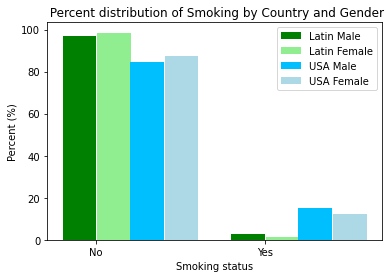

In [33]:
# Plot of smoking behavior comparison by gender (in Latin countries and in the U.S.)
X= np.arange(2)
x_ticks = ['No','Yes']

bar_width = 0.2
plt.bar(X-1*bar_width,y_LatinMale,label='Latin Male',width = bar_width,color='green')
plt.bar(X+0.03*bar_width,y_LatinFemale,label='Latin Female',width = bar_width,color='lightgreen')
plt.bar(X+1*bar_width,y_USAMale,label='USA Male',width = bar_width,color='deepskyblue')
plt.bar(X+2.03*bar_width,y_USAFemale,label='USA Female',width = bar_width,color='lightblue')

plt.xlabel('Smoking status')
plt.ylabel('Percent (%)')
plt.title(' Percent distribution of Smoking by Country and Gender')
plt.xticks(X-bar_width/2,x_ticks)
plt.legend()
plt.show()



<strong/><font size=3>Smoking Age by Country

In [34]:
# Count the number of smoking adults in Latin countires
df_Latin['Smoke_Latin'].value_counts()

no     1954
yes      44
Name: Smoke_Latin, dtype: int64

In [35]:
# Count the number of smoking adults in the U.S.
# This dataset is relatively bigger than the Latin dataset
df_USA['SmokeUSAyesNo'].value_counts()

no     24586
yes     3928
Name: SmokeUSAyesNo, dtype: int64

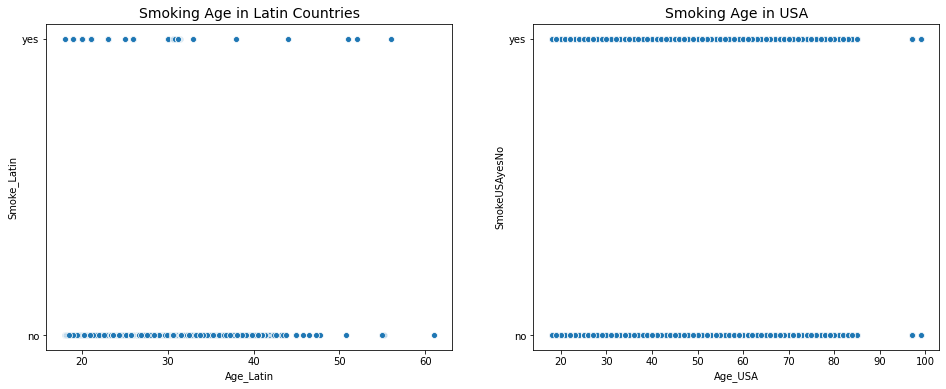

In [36]:
# Plotting scatter plots side by side to compare the distribution of smoking age in two datasets
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Smoking Age in Latin Countries',fontsize=14)
sns.scatterplot(x = df_Latin["Age_Latin"], y=df_Latin["Smoke_Latin"], ax=ax1)

ax2.set_title('Smoking Age in USA',fontsize=14)
sns.scatterplot(x = df_USA["Age_USA"], y=df_USA["SmokeUSAyesNo"], ax=ax2)

plt.show()


<strong/><font size=3>Explanation:</strong><br>
From the scatter plots above, we can see that adults with smoking behavior are distributed around 20 and 30 years old in Latin countries. <br>Adults in the U.S. with smoking behavior looks like distributed evenly among each age group.
Since the U.S. dataset is big, we might not give a conclusion from these plots. We could use hypothesis test to check if there is significant differences exists.

<strong/><font size=3>Body mass index distribution by country

In [37]:
BMI_USA = df_USA['BMIcont_USA']
BMI_Latin = df_Latin['BMIcont_Latin']

<strong/><font size=3>Plot histograms for both datasets, to check the distribution of BMI

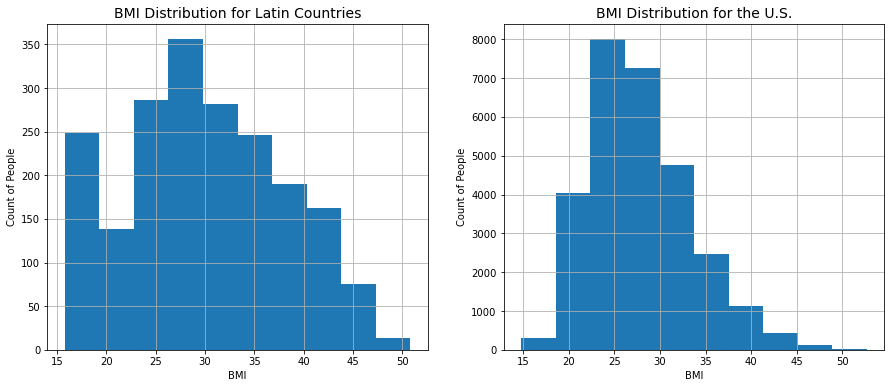

In [38]:
#Define axes and the figure. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

#Plot the left subplot: first filter df by outcome == 0 and then plot
BMI_Latin.hist(bins= 10,ax = axes[0])
#Right hand plot. 
BMI_USA.hist(bins= 10,ax = axes[1])

axes[0].set_title("BMI Distribution for Latin Countries",fontsize=14)
axes[1].set_title("BMI Distribution for the U.S.",fontsize=14)
axes[0].set_ylabel('Count of People')
axes[1].set_ylabel('Count of People')
axes[0].set_xlabel('BMI')
axes[1].set_xlabel('BMI')

plt.show()

<strong/><font size=3>Explanation:</strong><br> From the histogram, we can see that in the Latin countries, the largest group is at 27-29 BMI .<br>
For adults in the U.S., the dataset is relatively large, the plot shows a normal distribution curve, the largest group is around 22.5 to 26.

<strong/><font size=3>BMI by Age in Different Countries

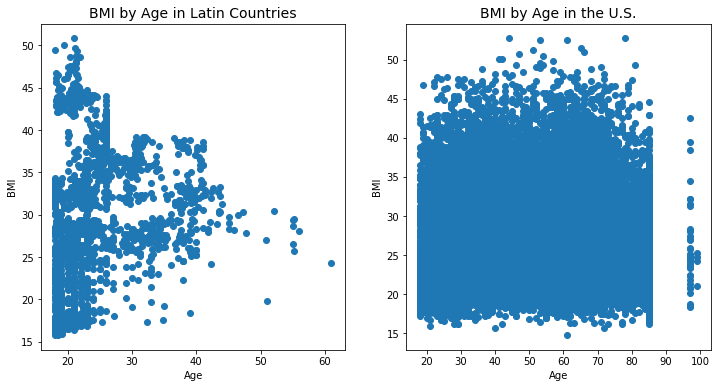

In [39]:
# Plotting scatterplots to compare the distribution differences
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axes[0].scatter(x=df_Latin['Age_Latin'], y=df_Latin['BMIcont_Latin'])
axes[1].scatter(x=df_USA['Age_USA'], y=df_USA['BMIcont_USA'])

axes[0].set_title("BMI by Age in Latin Countries",fontsize=14)
axes[1].set_title("BMI by Age in the U.S.",fontsize=14)
axes[0].set_ylabel('BMI')
axes[1].set_ylabel('BMI')
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Age')

plt.show()

<strong/><font size=3>Explanation: <br></strong>
From the scatterplots above, we can see that for adults in Latin countries, BMI are roughly from 16 to 40.<br>
In the U.S. the BMI are from 18 to 40. There are not that much of difference from the range of BMI.<br>
But since the U.S. dataset is big, visulization might not able to show the distribution differences clearly.<br>
Hence we will use hypothesis testing to do further research.



<strong/><font size=5> Part II: Hypothesis Testing and Statistical Analysis 
 
<strong/><font size=3>We performed hypothesis testing  using different test statistics and statistical methods.



<strong/><font size=4>Hypothesis 1:</strong><br>

**Objective:** Understanding the percentage of cigarette smokers differences in the U.S. and Latin America (Peru, Mexico, and Colombia).<br>
**Question:** Does the percentage of cigarette smoking vary by country?<br>
**Null Hypothesis (H0):** There is no difference between the percentage of adult smokers in different in the U.S. and Latin America (Peru, Mexico, and Colombia). <br>
**Alternative Hypothesis (H.A.):** There is a significant difference between the percentage of adult smokers in those countries.


<strong/><font size=3>Method  for Hypothesis testing: Z Test<br></strong>
The Z test can compare the percentage difference between two groups<br>
Significance Level: choose Alpha = 0.05 (default)



<strong/><font size=2>Data processing:<br></strong>
Creating new data frame by combining required variables for this test from two datasets, reorganizing, managing, and assessing in preparation for the test statistics.

In [40]:
# change the smoker values to percentage
df_USA_smokepercent=df_USA_smoke.value_counts(normalize=True, sort=True).mul(100).round(1)
USASmokerPercnt=df_USA_smokepercent.values[0:]
df_Latin_smokePercent=df_Latin_smoke.value_counts(normalize=True, sort=True).mul(100).round(1)
LatinSmokerPercnt=df_Latin_smokePercent.values[0:]

In [41]:
USASmokerPercnt

array([86.2, 13.8])

In [42]:
LatinSmokerPercnt

array([97.8,  2.2])

Note: From the sample,  percentage of USA smokers is 13.8% but percentage of Latin smokers is 2.2%. We will do Z-test to generalize the differnce of percentage of smokers beteewen the two conuntries.

In [43]:
# getting values (counts) of smokers and total to do the Z-test
USA_Smokers= df_USA_smoke.value_counts()[1]
Latin_Smokers= df_Latin_smoke.value_counts()[1]
USA_Total= df_USA_smoke.count()
Latin_Total= df_Latin['Smoke_Latin'].count()

In [44]:
# Test for proportions using Z test
smoker_each = np.array([USA_Smokers, Latin_Smokers])
Total_each = np.array([USA_Total, Latin_Total])
stat, pval = proportions_ztest(smoker_each, Total_each) # Z test for proportion
print("Z value is", stat)
print('The p value is {0:0.3f}'.format(pval))

Z value is 14.861796109997629
The p value is 0.000


<strong/><font size=3>Result summary: There is significant difference<br></strong>
From the above test we can see that the percentage of USA smokers and percentage of Latin America (Peru, Mexico, and Colombia) smokers are significanly different because the p-value (i.e 0.000) for the test result is less than alpha value. So we rejected the null hypotesis.



<strong/><font size=4>Hypothesis 2.1:</strong><br>
    
**Objective:** Understanding the relationship between Genders and Body Mass Index in different countries.<br>
**Null Hypothesis (H0):** There is no difference between males’ and females’ body mass index in those countries: U.S. and Latin America (Peru, Mexico, and Colombia).<br>
**Alternative Hypothesis (H.A.):** There is a significant difference between males and females body mass index in these countries.<br>

<strong/><font size=3>Method: ANOVA<br></strong>
    
Anova is used since we are comparing BMI of four differnt groups: USA Male, USA Female, Latin Male and Latin Female.
    
Significance Level: choose Alpha = 0.05 (default)
    




<strong/><font size=2>Data processing:<br></strong>
Creating new data frame by combining required variables for this test from two datasets, reorganizing, managing, and assessing in preparation for the test statistics.

In [45]:
# copy the columns from the USA dataset 
BMIGender_USA= df_USA[['BMIcont_USA','Gender_USA']].copy()
# rename the columns and replace the values to have similar value set 
BMIGender_USA=BMIGender_USA.rename(columns={'BMIcont_USA':'BMIcont_USA_Latin','Gender_USA': 'Gender_Latin_USA'})
BMIGender_USA['Gender_Latin_USA'] = BMIGender_USA['Gender_Latin_USA'].replace([1,2],['M_USA','F_USA'])

In [46]:
# copy the columns from the Latin countries dataset 
BMIGender_Latin= df_Latin[['BMIcont_Latin','Gender_Latin']].copy()
# rename the columns and replace the values to have similar value set
BMIGender_Latin=BMIGender_Latin.rename(columns={'BMIcont_Latin':'BMIcont_USA_Latin','Gender_Latin': 'Gender_Latin_USA'})
BMIGender_Latin['Gender_Latin_USA'] = BMIGender_Latin['Gender_Latin_USA'].replace(['Female','Male'],['F_Latin','M_Latin'])

In [47]:
BMIGender_Latin.head() # new Latin dataframe

,BMIcont_USA_Latin,Gender_Latin_USA
0,24.386526,F_Latin
1,24.238227,F_Latin
2,23.765432,M_Latin
3,26.851852,M_Latin
4,28.342381,M_Latin


In [48]:
BMIGender_USA.head() # new USA dataframe

,BMIcont_USA_Latin,Gender_Latin_USA
0,28.030748,M_USA
1,23.774714,F_USA
2,27.601351,M_USA
3,39.326775,M_USA
4,39.326775,M_USA


In [49]:
# combined the datasets together
BMIGender_All = pd.concat([BMIGender_USA,BMIGender_Latin], axis=0)

In [50]:
BMIGender_All.head()  # combined the two new dataframes

,BMIcont_USA_Latin,Gender_Latin_USA
0,28.030748,M_USA
1,23.774714,F_USA
2,27.601351,M_USA
3,39.326775,M_USA
4,39.326775,M_USA


In [51]:
# find the mean of each group
BMIGender_All.groupby('Gender_Latin_USA').mean()

,BMIcont_USA_Latin
Gender_Latin_USA,
F_Latin,30.547727
F_USA,27.660738
M_Latin,29.764940
M_USA,28.040809


Note: From the sample Mean result, BMI of Latin is higher than BMI of USA, and BMI of Latin Female is the highest. To generalize this difference for all population of the two countries, We will do Anova Test.


In [52]:
model = ols('BMIcont_USA_Latin ~ Gender_Latin_USA', data=BMIGender_All).fit() # Anova Test using OLS, Ordinary least-squares (OLS) regression 
anov_table = sm.stats.anova_lm(model,type=2)   
print(anov_table)
print()

print('p value is {0:3f}'.format(anov_table.iloc[0,4]))

                       df         sum_sq      mean_sq           F  \
Gender_Latin_USA      3.0   11338.554356  3779.518119  118.227735   
Residual          30508.0  975283.323563    31.968117         NaN   

                        PR(>F)  
Gender_Latin_USA  3.993609e-76  
Residual                   NaN  

p value is 0.000000


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BMIcont_USA_Latin   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     118.2
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           3.99e-76
Time:                        13:30:23   Log-Likelihood:                -96151.
No. Observations:               30512   AIC:                         1.923e+05
Df Residuals:                   30508   BIC:                         1.923e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      30.5477      0.180    170.167      0.000      30.196      30.900
Gender_Latin_USA[T.F_USA]      -2.8870      0.185    -15.581      0.000      -3.250      -2.524
Gender_Latin_USA[T.M_Latin]    -0.7828      0.253     -3.094      0.002      -1.279      -0.287
Gender_Latin_USA[T.M_USA]      -2.5069      0.186    -13.473      0.000      -2.872      -2.142
==============================================================================
Omnibus:                     1882.832   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2253.380
Skew:                           0.641   Prob(JB):                         0.00
Kurtosis:                       3.356   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<strong/><font size=3>Result summary: There is significant difference among the groups:</strong><br>
        
From the above ANOVA test we can see that there is significant difference of BMI among the four groups: USA Males, USA Females, Latin Males and Latin Females. The P-value (i.e 0.000) for the test result is less than alpha value (0.05 default). Hence, we reject the null hypothesis. 
The BMI of Latin Females, which is the reference of ANOVA is significantly higher than the BMI of USA Males, USA Females and Latin Males. 
Particularly, the BMI of Latin Females is significantly higher than The BMI of USA Females.     

However, the ANOVA test result is not clear about BMI of USA Male and Latin Male, so we will use T-test to 
compare these two groups. 


<strong/><font size=4>Hypothesis Testing: Hypothesis 2.2 </strong><br>
For BMI of USA Male and Latin Male 

**Objective:**Comparing Body Mass Index (BMI) of Latin Males and USA Males.<br>
**Question:**Is there any difference of BMI by country for male  group?<br>
**Null Hypothesis(H0):** There is no difference of BMI between Latin Male and  USA Male.<br>
**Alternative Hypothesis(H.A.):** There is statistically significant difference btween Latin Male BMI and USA Male BMI.<br>

<strong/><font size=3>Method:T-Test</strong><br>

In [54]:
# The Anova Test does not tell us the comparison between Latin Male and USA Male. 
# We can compare these by using T-Test. 
group1= BMIGender_All['BMIcont_USA_Latin'][BMIGender_All['Gender_Latin_USA'] == 'M_Latin']  # group forming and labeling 
group2=BMIGender_All['BMIcont_USA_Latin'][BMIGender_All['Gender_Latin_USA'] == 'M_USA']   # group forming and labeling 
summary, result= researchpy.ttest(group1,group2, group1_name= "Male_Latin", group2_name= "Male_USA")   # used T test
summary   # output for summary


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Male_Latin,1006.0,29.764940,6.068478,0.191329,29.389490,30.140390
1,Male_USA,13339.0,28.040809,4.775327,0.041347,27.959763,28.121854
2,combined,14345.0,28.161720,4.896786,0.040885,28.081581,28.241860


In [55]:
result[0:4]    # main result for the T test

,Independent t-test,results
0,Difference (Male_Latin - Male_USA) =,1.7241
1,Degrees of freedom =,14343.0000
2,t =,10.8123
3,Two side test p value =,0.0000


<strong/><font size=3>Result summary:<br></strong>
From the t-test result, the p-value is 0.0000, which is smaller than alpha (0.05 by default),
we can say that there is significant differences between Males BMI in Latin countries and Males BMI in the U.S.


<strong/><font size=4>Hypothesis 3:<br></strong>

**Objective:**Studying the BMI differences between the adults in the U.S. and Latin America (Peru, Mexico, and Colombia) by Age groups.<br>
**Question:** Does the body mass index distribution differ by Age in different countries?<br>
**Null Hypothesis (H0):** There is no difference in BMI distribution between the adults in the U.S. and Latin America (Peru, Mexico, and Colombia) by Age groups.<Br>
**Alternative Hypothesis (H.A.):** There is a significant difference in BMI distribution between the adults in the U.S. and Latin America (Peru, Mexico, and Colombia) by Age groups.<Br>






<strong/><font size=2>Data processing:<br></strong>
Creating new data frame by combining required variables for this test from two datasets, reorganizing, managing, and assessing in preparation for the test statistics.

In [56]:
# copy the age and BMI from original datasets and find the mean BMI for each age group
BMIAge_USA= df_USA[['Age_USA','BMIcont_USA']].copy()
BMIAge_Latin= df_Latin[['Age_Latin','BMIcont_Latin']].copy()
BMIAge_Latin=BMIAge_Latin.round({'Age_Latin': 0})
BMIAge_USAMean=BMIAge_USA.groupby('Age_USA').mean()
BMIAge_LatinMean=BMIAge_Latin.groupby('Age_Latin').mean()

Note: Mean BMI is calculated for each age group.

In [57]:
# mena BMI for each age group in the U.S.
BMIAge_USAMean.head()

,BMIcont_USA
Age_USA,
18,24.690589
19,25.480138
20,25.897276
21,25.757238
22,26.063979


In [58]:
# mean BMI for each age group in Latin countries
BMIAge_LatinMean.head()

,BMIcont_Latin
Age_Latin,
18.0,26.059969
19.0,25.468426
20.0,26.221017
21.0,29.774400
22.0,29.245993


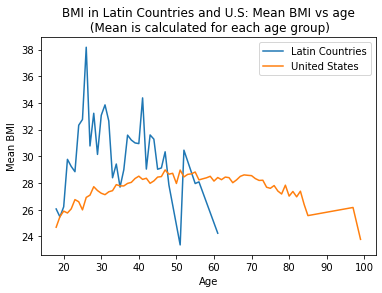

In [59]:
# Plot of Mean BMI vs Age for Latin countries data and the U.S. data
plt.plot(BMIAge_LatinMean,label="Latin Countries")
plt.plot(BMIAge_USAMean,label="United States")

plt.title("BMI in Latin Countries and U.S: Mean BMI vs age\n (Mean is calculated for each age group)")
plt.ylabel("Mean BMI")
plt.xlabel("Age")
plt.legend()
plt.show()

<strong/><font size=3>Explanantion:<br></strong>
From the graph above, we can see that adults from age 20 to 48 in Latin countries have high mean BMI than the same age range of adults in the U.S. Adults from around 48 to 51 in the U.S. have higher mean BMI than adults in same age range in Latin countries. Hence, there are significant differences between the BMI vs Age in different countries. To study the strength of the relationship between BMI and age in different countries, we use correlation, linear regression and T test.


<strong/><font size=3>Is there any corrolation between age and BMI?





In [60]:
BMIAge_USA.corr() # Correlation between age and BMI for USA

,Age_USA,BMIcont_USA
Age_USA,1.000000,0.032527
BMIcont_USA,0.032527,1.000000


In [61]:
BMIAge_Latin.corr() # Correlation between age and BMI for Latin

,Age_Latin,BMIcont_Latin
Age_Latin,1.000000,0.195207
BMIcont_Latin,0.195207,1.000000


In [62]:
# Fitting linear model for USA
results = ols(formula="BMIcont_USA~Age_USA", data=BMIAge_USA).fit()
print('Parameters: ', results.params)
print('R squared: ', results.rsquared)

Parameters:  Intercept    27.333374
Age_USA       0.009687
dtype: float64
R squared:  0.0010580020996178163


In [63]:
# Fitting linear model for Latin
results = ols(formula="BMIcont_Latin~Age_Latin", data=BMIAge_Latin).fit()
print('Parameters: ', results.params)
print('R squared: ', results.rsquared)

Parameters:  Intercept    24.079265
Age_Latin     0.245614
dtype: float64
R squared:  0.03810570423844972


In [64]:
BMIAge_Latin['BMIcont_Latin'].corr(BMIAge_USA['BMIcont_USA']) # corrolation between USA BMI and Latin BMI

0.03430932637046122

<strong/><font size=3>Summary of Correlation and linear regression<br></strong>
The correlation result shows that there is no  that much strong correlation between age and BMI for both USA and Latin countries.<br> We also fitted the data with linear regression model to understand if there is any linear relationship between age and BMI.<br> 
The Linear regression models also show weak relationship between age and BMI.
 <br>Moreover, there is no significant correlation between BMI of USA and BMI of Latin population.

<strong/><font size=3>Hypothesis 3: More analysis for age group less than or equal to 45<br></strong>

**Objective:** Studying the BMI differences between the adults in the U.S. and Latin America for age group less than or equal to 45. <br>

**Null Hypothesis (H0):** For age group less than or equal to 45, there is no difference in BMI distribution between the adults in the U.S. and Latin America (Peru, Mexico, and Colombia).<Br>
**Alternative Hypothesis (H.A.):** For age group less than or equal to 45, there is a significant difference in BMI distribution between the adults in the U.S. and Latin America (Peru, Mexico, and Colombia).<Br>

In [65]:
# Set up the age groups 
BMIAge45_USA= BMIAge_USA[BMIAge_USA.Age_USA<=45]
BMIAge45_Latin= BMIAge_Latin[BMIAge_Latin.Age_Latin<=45]

In [66]:
BMIAge45_USAMeanAll =BMIAge45_USA['BMIcont_USA'].mean()
BMIAge45_USAMeanAll

27.42674486358537

In [67]:
BMIAge45_LatinMeanAll =BMIAge45_Latin['BMIcont_Latin'].mean()
BMIAge45_LatinMeanAll

30.17191374875478

The means of BMI for adults under 45 years old are different for Latin countries and the U.S. We use T-test to generalize this.

<strong/><font size=3>Method: T Test to compare BMI for USA and Latin for age less than or equal to 45

In [68]:
group1= BMIAge45_USA['BMIcont_USA'] # group forming and labeling 
group2=BMIAge45_Latin['BMIcont_Latin']  # group forming and labeling 
summary, result= researchpy.ttest(group1,group2, group1_name= "USA_ageUpto45", group2_name= "Latin_ageUpto45")   # used T test
summary   # output for summary


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,USA_ageUpto45,11054.0,27.426745,5.608065,0.053340,27.322189,27.531301
1,Latin_ageUpto45,1984.0,30.171914,7.924042,0.177900,29.823023,30.520804
2,combined,13038.0,27.844479,6.098139,0.053406,27.739795,27.949163


In [69]:
result[0:4]    # main result for the T test

,Independent t-test,results
0,Difference (USA_ageUpto45 - Latin_ageUpto45) =,-2.7452
1,Degrees of freedom =,13036.0000
2,t =,-18.7083
3,Two side test p value =,0.0000


<strong/><font size=3>Summary:<br></strong>
From the t-test result above, we can say that for age group less than or equal to 45, there is a significant difference in BMI distribution between the adults in the U.S. and Latin America (Peru, Mexico, and Colombia) since the P-value is equal to 0.000, which is less than 0.05. Hence, we reject the Null hypothesis.






<strong/><font size=4>Hypothesis 4:<br></strong>
    
**Objective:** Studying the differences in smoking Age distribution in the U.S. and Latin America (Peru, Mexico, and Colombia).<br>
**Question:** Does the smoking age  distribution vary by country?<br>
**Null Hypothesis (H0):** There is no difference in age distribution between adults who consume cigarettes in the U.S. and Latin America (Peru, Mexico, and Colombia).<br>
**Alternative Hypothesis (H.A.):** There is a significant difference in age distribution between adults who consume cigarettes in the U.S. and Latin America (Peru, Mexico, and Colombia).<br>

<strong/><font size=3>Note: For Hypothesis 4, we will do two Hypothesis tests: Hypothesis 4.1 and Hypothesis 4.2.




<strong/><font size=2>Data processing:<br></strong>
Creating new data frame by combining required variables for this test from two datasets, reorganizing, managing, and assessing in preparation for the test statistics.

In [70]:
# Copy the Age and Smoke data from the USA datasets and convert them to similar value set:
AgeSmoke_USA= df_USA[['Age_USA','SmokeUSAyesNo']].copy()
AgeSmoke_USA = AgeSmoke_USA.rename(columns={'Age_USA':'Age_USA_Latin','SmokeUSAyesNo':'Smoke_Latin_USA'})
AgeSmoke_USA['Smoke_Latin_USA'] = AgeSmoke_USA['Smoke_Latin_USA'].replace(['yes','no'],['Yes_USA','No_USA'])
AgeSmoke_USA.head() # new dataframe for USA

,Age_USA_Latin,Smoke_Latin_USA
0,97,No_USA
1,28,Yes_USA
2,72,No_USA
3,60,No_USA
4,60,Yes_USA


In [71]:
# Copy the Age and Smoke data from the Latin countries datasets and convert them to similar value set:
AgeSmoke_Latin= df_Latin[['Age_Latin','Smoke_Latin']].copy()
AgeSmoke_Latin = AgeSmoke_Latin.rename(columns={'Age_Latin':'Age_USA_Latin','Smoke_Latin':'Smoke_Latin_USA'})
AgeSmoke_Latin['Smoke_Latin_USA'] = AgeSmoke_Latin['Smoke_Latin_USA'].replace(['yes','no'],['Yes_Latin','No_Latin'])
AgeSmoke_Latin.head() # new dataframe to Latin

,Age_USA_Latin,Smoke_Latin_USA
0,21.0,No_Latin
1,21.0,Yes_Latin
2,23.0,No_Latin
3,27.0,No_Latin
4,22.0,No_Latin


In [72]:
# combine two dataframes  
AgeSmoke_All = pd.concat([AgeSmoke_USA,AgeSmoke_Latin], axis=0)
AgeSmoke_All.head() # the combined dataframe from the two new dataframes

,Age_USA_Latin,Smoke_Latin_USA
0,97.0,No_USA
1,28.0,Yes_USA
2,72.0,No_USA
3,60.0,No_USA
4,60.0,Yes_USA


<strong/><font size=4>Hypothesis 4.1:<br></strong>

**Objective:** Studying the Relationship (dependency) between age and smoking regardless of country.<br>
**Question:** is there a relationship (dependency) between age and smoking  regardless of country?<br>
**Null Hypothesis (H0):** There is no relationship (dependency) between age and smoking  regardless of country.<br>
**Alternative Hypothesis (H.A.):** There is a significant relationship (dependency) between age and smoking regardless of country.<br>

<strong/><font size=3>Method: Chi-squared test.<br></strong>

In [73]:
# categorize and lebel it as new age column
category = pd.cut(AgeSmoke_All.Age_USA_Latin,bins=[18,30,45,60,99],labels=['Young','Adult_1','Adult_2','Elderly'])
AgeSmoke_All.insert(1,'Age_category',category)


In [74]:
AgeSmoke_All.head() # with new age category column

,Age_USA_Latin,Age_category,Smoke_Latin_USA
0,97.0,Elderly,No_USA
1,28.0,Young,Yes_USA
2,72.0,Elderly,No_USA
3,60.0,Adult_2,No_USA
4,60.0,Adult_2,Yes_USA


In [75]:
researchpy.crosstab(AgeSmoke_All["Age_category"], AgeSmoke_All["Smoke_Latin_USA"])

Smoke_Latin_USA                                
Smoke_Latin_USA        No_Latin No_USA Yes_Latin Yes_USA    All
Age_category                                                   
Young                      1489   3597        25     563   5674
Adult_1                     327   5584        15    1075   7001
Adult_2                      10   5727         3    1211   6951
Elderly                       1   9452         0    1070  10523
All                        1827  24360        43    3919  30149

In [76]:
# Chi-Square Test between smoking by age in two countries(USA and Latin)

crosstab, result, expected =researchpy.crosstab(AgeSmoke_All["Age_category"], AgeSmoke_All["Smoke_Latin_USA"],
                                             test= "chi-square",              # This is the test used
                                             expected_freqs= True)            # This is to get the expected cell counts.
result

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,5493.6586
1,p-value =,0.0000
2,Cramer's V =,0.2465


<strong/><font size=3>Summary:<br></strong> The test result (P-value = 0) shows that there is a significant relationship (dependency) between age and smoking regardless of country.<br>



<strong/><font size=4>Hypothesis 4.2:<br></strong>
    
**Objective:** Studying  the age distribution of smokers in USA compared to the age distribution of smokers in Latin America (Peru, Mexico, and Colombia).<br>
**Question:** Does the age distribution of smokers vary by country?<br>
**Null Hypothesis (H0):** There is no difference in age distribution between adults who consume cigarettes in the U.S. and that of Latin America (Peru, Mexico, and Colombia).<br>
**Alternative Hypothesis (H.A.):** There is a significant difference in age distribution between adults who consume cigarettes in the U.S. and Latin America(Peru, Mexico, and Colombia).<br>

<strong/><font size=3>Method: Chi-squared test.<br></strong>

In [77]:
AgeSmokeyes_All=AgeSmoke_All[(AgeSmoke_All["Smoke_Latin_USA"] =='Yes_USA')|(AgeSmoke_All["Smoke_Latin_USA"] =='Yes_Latin')]

In [78]:
AgeSmokeyes_All # All smokers in both countries(Latin and USA)

,Age_USA_Latin,Age_category,Smoke_Latin_USA
1,28.000000,Young,Yes_USA
4,60.000000,Adult_2,Yes_USA
7,61.000000,Elderly,Yes_USA
10,63.000000,Elderly,Yes_USA
11,28.000000,Young,Yes_USA
...,...,...,...
1676,30.684347,Adult_1,Yes_Latin
1727,31.205668,Adult_1,Yes_Latin
1728,30.899219,Adult_1,Yes_Latin
1763,31.199261,Adult_1,Yes_Latin


In [79]:
researchpy.crosstab(AgeSmokeyes_All["Age_category"], AgeSmokeyes_All["Smoke_Latin_USA"])

Smoke_Latin_USA              
Smoke_Latin_USA       Yes_Latin Yes_USA   All
Age_category                                 
Young                        25     563   588
Adult_1                      15    1075  1090
Adult_2                       3    1211  1214
Elderly                       0    1070  1070
All                          43    3919  3962

In [80]:
# Chi-Square Test between smoking by age in two countries(USA and Latin)

crosstab, result, expected =researchpy.crosstab(AgeSmokeyes_All["Age_category"], AgeSmokeyes_All["Smoke_Latin_USA"],
                                             test= "chi-square",              # This is the test used
                                             expected_freqs= True)            # This is to get the expected cell counts.
result

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,75.4591
1,p-value =,0.0000
2,Cramer's V =,0.1380


<strong/><font size=3>Summary:<br></strong> The test result (P-value = 0) shows that  the age distribution of smokers in USA is significantly different from  the age distribution of smokers in Latin (Peru, Mexico, and Colombia.<br>
**Note:** Having small number of smokers in the sample of Latin Americ (Peru, Mexico, and Colombia) may affect the analysis.<br>

<strong/><font size=4>Conclusion<br></strong>
From this project, we used two datasets to conduct the exploratory data analysis and tested serval hypotheses based on the given information from the datasets.<br>
The analysis focused on statistical data analysis and answer specific questions for 18 and older adults. The results of this project showed different relationships between specific variables.<br>

We learned that:<br>
- The percentages of cigarette smoking vary by country.
- The BMI of females of Latin America is higher than the BMI of males of Latin America, BMI of USA male and BMI of USA female.
- There are significant differences between BMI of Males  in Latin countries and BMI of Males in the U.S.
- For the age groups less than or equal to 45, there is a significant  difference in BMI distribution between the adults in the U.S. and Latin America(Peru, Mexico, and Colombia).
- There is a significant relationship (dependency) between age and smoking regardless of country.
- There is a significant difference in age distribution between adults who consume cigarettes in the U.S. and Latin America(Peru, Mexico, and Colombia).

 
  


This project helps us to understand how to combine,organize and manage  information from two large datasets (or more than two), and how to convert different formats of data to something that we can use to do the analysis.
It is interesting to explore different datasets, and sharing ideas with groupmates. We  get hands on experience to implement statistical methods and tests to make conclusion.  It helps us to think from different perspectives and enables us to gain more experience from teamwork.